<a href="https://colab.research.google.com/github/Daisuke-lab/object_detection_with_yolov3/blob/main/yolov3_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14321, done.
remote: Total 14321 (delta 0), reused 0 (delta 0), pack-reused 14321
Receiving objects: 100% (14321/14321), 12.87 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (9771/9771), done.


In [ ]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:249:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:845:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:8

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   fox_sample.jpg   obj.zip   yolov3
 darknet-master     images	     test      写真


In [ ]:
!cp /mydrive/yolov3/backup/yolov3_custom2_2000.weights  /content/darknet/cfg

In [ ]:
!cp /mydrive/obj.zip ../

In [ ]:
!unzip ../obj.zip -d /content/darknet/data

Archive:  ../obj.zip
  inflating: /content/darknet/data/obj/00127b8f3a9fe4a2.jpg  
  inflating: /content/darknet/data/obj/00127b8f3a9fe4a2.txt  
  inflating: /content/darknet/data/obj/0012bf34ebf62477.jpg  
  inflating: /content/darknet/data/obj/0012bf34ebf62477.txt  
  inflating: /content/darknet/data/obj/0016a719395bc945.jpg  
  inflating: /content/darknet/data/obj/0016a719395bc945.txt  
  inflating: /content/darknet/data/obj/00177ceb15288905.jpg  
  inflating: /content/darknet/data/obj/00177ceb15288905.txt  
  inflating: /content/darknet/data/obj/004c5c9ea479e2d0.jpg  
  inflating: /content/darknet/data/obj/004c5c9ea479e2d0.txt  
  inflating: /content/darknet/data/obj/00648ee778a0a959.jpg  
  inflating: /content/darknet/data/obj/00648ee778a0a959.txt  
  inflating: /content/darknet/data/obj/006aa31a813a58c8.jpg  
  inflating: /content/darknet/data/obj/006aa31a813a58c8.txt  
  inflating: /content/darknet/data/obj/006ffa144038c36f.jpg  
  inflating: /content/darknet/data/obj/006ffa1440

In [ ]:
!cp /mydrive/yolov3/yolov3_custom2.cfg /content/darknet/cfg

In [ ]:

!sed -i 's/batch=64/batch=1/' /content/darknet/cfg/yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' /content/darknet/cfg/yolov3_custom2.cfg
%cd ..


/


In [ ]:
!cp /mydrive/yolov3/generate_train.py ./
%cd /content/darknet
!python generate_train.py

/content/darknet


In [ ]:
!cp /mydrive/yolov3/obj.names /content/darknet/data
!cp /mydrive/yolov3/obj.data  /content/darknet/data

In [ ]:
!ls /content/darknet/data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:

!./darknet detector test data/obj.data /content/darknet/cfg/yolov3_custom2.cfg /content/darknet/cfg/yolov3_custom2_2000.weights /mydrive/fox_sample.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

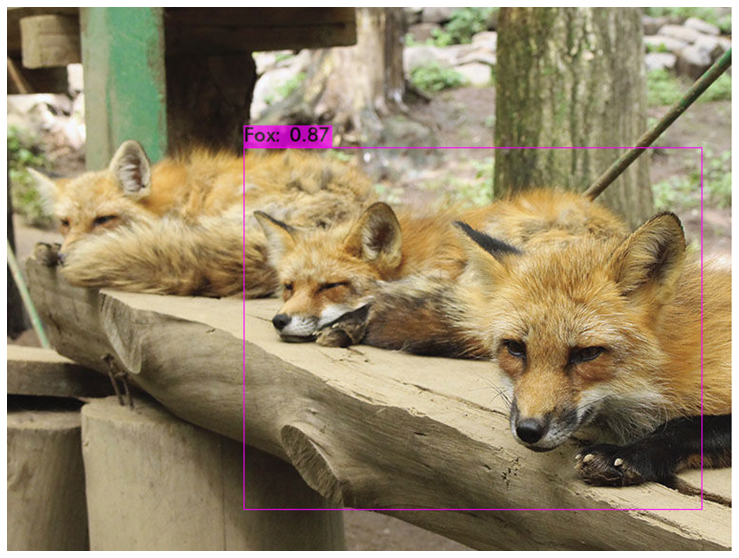

In [ ]:
imShow('predictions.jpg')

In [ ]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>